In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/Datasets/data.csv')
d

Mounted at /content/drive


,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [2]:
X=d.iloc[:,1:-1]
y=d.iloc[:,-1]

In [3]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [4]:
y_pred=lr.predict(X)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

In [5]:
result=pd.DataFrame({'Actual':y,'Predicted':y_pred})
result

,Actual,Predicted
0,0.0002,-0.050867
1,0.0012,-0.004027
2,0.0060,0.042813
3,0.0300,0.089653
4,0.0900,0.136493
5,0.2700,0.183333


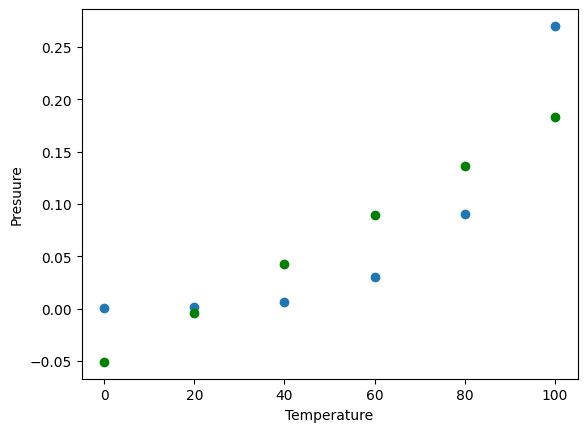

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('Temperature')
plt.ylabel("Presuure")
plt.scatter(X,y)
plt.scatter(X,y_pred,c='green')

In [7]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score:',r2_score(y,y_pred))
print('MAE:',mean_absolute_error(y,y_pred))

R2 score: 0.690349972603981
MAE: 0.047653333333333346


# Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
X_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [9]:
plr=LinearRegression()
plr.fit(X_poly,y)

LinearRegression()

In [10]:
y_pred1=plr.predict(X_poly)
y_pred1

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [11]:
result_poly=pd.DataFrame({'Actual':y,'Predicted':y_pred1})
result_poly

,Actual,Predicted
0,0.0002,-0.001989
1,0.0012,0.007244
2,0.0060,0.003711
3,0.0300,0.022489
4,0.0900,0.098656
5,0.2700,0.267289


for plotting X is used

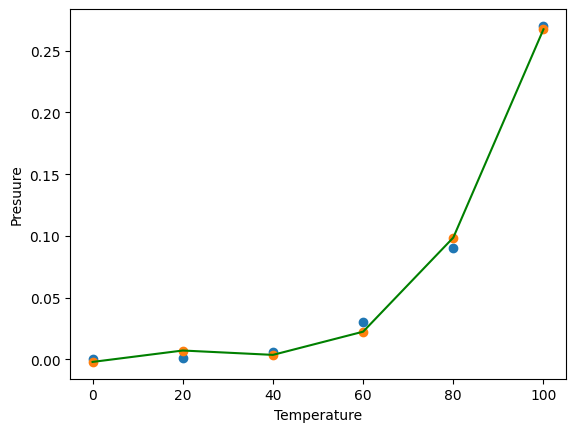

In [12]:
plt.xlabel('Temperature')
plt.ylabel("Presuure")
plt.scatter(X,y)
plt.scatter(X,y_pred1)
plt.plot(X,y_pred1,c='green')

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score:',r2_score(y,y_pred1))
print('MAE:',mean_absolute_error(y,y_pred1))

R2 score: 0.9966691251761722
MAE: 0.004899999999992323


before inputting we need to transfrom as a polynomial

In [14]:
n=int(input('Enter the temperature:'))
y_new=plr.predict(poly.transform([[n]]))
print('pressure is ,',y_new)

Enter the temperature:35
pressure is , [0.003873]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
